In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## File locations

In [5]:
loc_hert = 'hert.png'
loc_zonnebril = 'zonnebril.png'

## Read data

In [31]:
def read_gray_image(loc_img):

    # Open the PNG image file
    img = Image.open(loc_img)

    # Display information about the image
    print("Image format:", img.format)
    print("Image size:", img.size)
    print("Image mode:", img.mode)

    # Perform further operations on the image if needed
    # For example, you can convert the image to grayscale:
    img_gray = img.convert("L")
    return img_gray

#### Read image 1

In [32]:
img_hert = read_gray_image(loc_hert)
img_zonnebril = read_gray_image(loc_zonnebril)

Image format: PNG
Image size: (428, 393)
Image mode: RGB
Image format: JPEG
Image size: (820, 430)
Image mode: RGB


## Adjust individual images

#### Invert colors for the deer

In [29]:
mat_hert = np.array(img_hert)
# Replace black -> white & white -> black
loc_0 = mat_hert < 100
loc_255 = mat_hert > 100
mat_hert[loc_0] = 255
mat_hert[loc_255] = 200

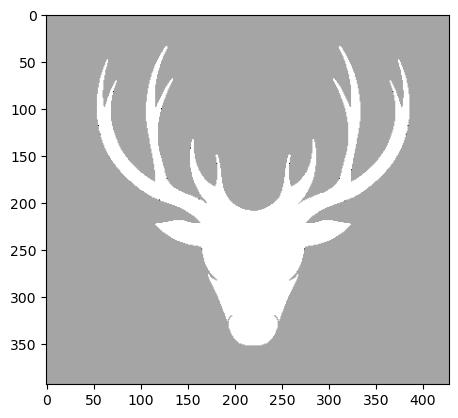

In [30]:
plt.imshow(mat_hert, cmap = 'gray')

## Adjust sunglasses to fith the deer

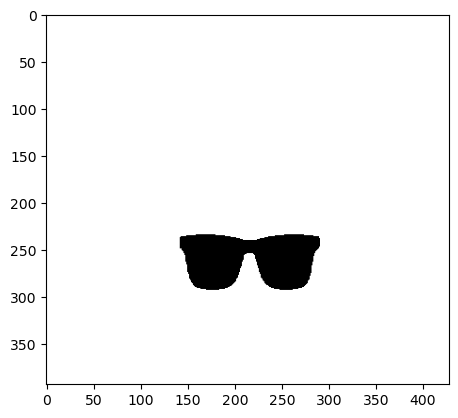

In [121]:
# Resize to fit size of deer
img_zonnebril = img_zonnebril.resize(img_hert.size)
mat_zonnebril = np.array(img_zonnebril)

# Remove noise
loc_0 = mat_zonnebril < 100
loc_255 = mat_zonnebril > 100
mat_zonnebril[loc_0] = 0
mat_zonnebril[loc_255] = 255

## Move sunglasses down & to the right
num_positions_down = 100
num_positions_right = 45
shifted_mat_zonnebril = np.empty_like(mat_zonnebril)

# Move the values down by shifting the rows
shifted_mat_zonnebril[num_positions_down:, :] = mat_zonnebril[:-num_positions_down, :]
shifted_mat_zonnebril[:num_positions_down, :] = 255  # Fill the top rows with white

# Shift a bit to the right
shifted_mat_zonnebril[:, num_positions_right:] = shifted_mat_zonnebril[:, :-num_positions_right]
shifted_mat_zonnebril[:, :num_positions_right] = 255  # Fill the top rows with white

## Make sunglasses smaller
start_shrink_vertical = 230
end_shrink_vertical = 370

start_shrink_horizontal = 85 + num_positions_right
end_shrink_horizontal = 345 + num_positions_right

# Vertical shrink
top_part = shifted_mat_zonnebril[:start_shrink_vertical]
sunglasses_shrinked = shifted_mat_zonnebril[start_shrink_vertical:end_shrink_vertical:2]
end_part = 255 * np.ones((        
                            shifted_mat_zonnebril.shape[0] - top_part.shape[0] - sunglasses_shrinked.shape[0],
                            shifted_mat_zonnebril.shape[1]
                            ))

shifted_shrinked_mat_zonnebril = np.concatenate([top_part, sunglasses_shrinked, end_part])

# Horizontal shrink
left_part = shifted_shrinked_mat_zonnebril[:, :start_shrink_horizontal]
sunglasses_shrinked = shifted_shrinked_mat_zonnebril[:, start_shrink_horizontal:end_shrink_horizontal]
sunglasses_shrinked = sunglasses_shrinked[:, np.arange(sunglasses_shrinked.shape[1]) % 3 != 2]
end_part = 255 * np.ones((        
                            shifted_shrinked_mat_zonnebril.shape[0],
                            shifted_shrinked_mat_zonnebril.shape[1] - left_part.shape[1] - sunglasses_shrinked.shape[1],
                            ))

shifted_shrinked_mat_zonnebril = np.concatenate([left_part, sunglasses_shrinked, end_part], axis = 1)

mat_zonnebril = shifted_shrinked_mat_zonnebril

plt.imshow(mat_zonnebril, cmap = 'gray')

## Combine images

In [122]:
mat_combined = mat_hert.copy()
mat_combined[mat_zonnebril == 0] = 0

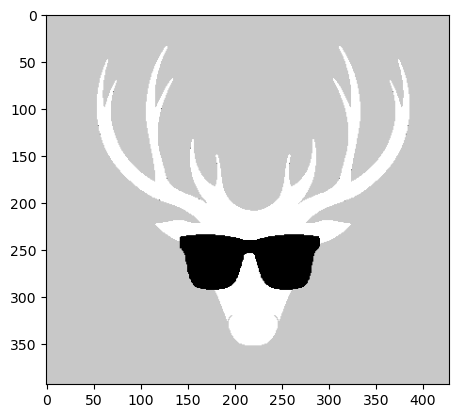

In [123]:
plt.imshow(mat_combined, cmap = 'gray')

## Make background transparant

In [128]:
# Convert the NumPy matrix to a PIL Image object
image = Image.fromarray(mat_combined)

# Create a new image with transparent background
transparent_image = image.convert("RGBA") # Red Green Blue Alpha (alpha = transparency)

# Get the pixel data of the image
pixels = transparent_image.getdata()

# Create a new list to store the modified pixel data
modified_pixels = [(pixel[0], pixel[1], pixel[2], 0 if pixel[0] == 200 else 255) for pixel in pixels]

# Update the image with the modified pixel data
transparent_image.putdata(modified_pixels)

# Save the image as PNG with transparency
transparent_image.save("transparent_image.png", format="PNG")
